In [1]:
# Cell 1
import pandas as pd

df=pd.read_csv('nutrition.dat',delim_whitespace=True)
print(df.columns)
df=df.drop('FOOD',axis=1)
#df.describe

Index(['FOOD', 'WT_GRAMS', 'PC_WATER', 'CALORIES', 'PROTEIN', 'FAT', 'SAT_FAT',
       'MONUNSAT', 'POLUNSAT', 'CHOLEST', 'CARBO', 'CALCIUM', 'PHOSPHOR',
       'IRON', 'POTASS', 'SODIUM', 'VIT_A_IU', 'VIT_A_RE', 'THIAMIN',
       'RIBOFLAV', 'NIACIN', 'ASCORBIC', 'CAL_GRAM', 'IRN_GRAM', 'PRO_GRAM',
       'FAT_GRAM'],
      dtype='object')


In [2]:
# Cell 2
# Python code for multiple regression model with all factors
import statsmodels.formula.api as sm
model1 = sm.ols(formula='CALORIES~WT_GRAMS+PC_WATER+PROTEIN+FAT+SAT_FAT+MONUNSAT+POLUNSAT+CHOLEST+CARBO+CALCIUM+PHOSPHOR+IRON+POTASS+SODIUM+VIT_A_IU+VIT_A_RE+THIAMIN+RIBOFLAV+NIACIN+ASCORBIC+CAL_GRAM+IRN_GRAM+PRO_GRAM+FAT_GRAM',data=df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:               CALORIES   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.962e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:41:59   Log-Likelihood:                -3979.2
No. Observations:                 961   AIC:                             8008.
Df Residuals:                     936   BIC:                             8130.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.2779      6.937     -9.987      0.0

# Cell 3
## List factors that can be removed based upon p-values

+ MONUNSAT
+ POLUNSAT
+ CHOLEST
+ VIT_A_IU
+ VIT_A_RE
+ RIBOFLAV
+ NIACIN
+ ASCORBIC

In [3]:
# Cell 4
# Python code for fitting reduced multiple regression model
model2 = sm.ols(formula='CALORIES~WT_GRAMS+PC_WATER+PROTEIN+FAT+SAT_FAT+CARBO+CALCIUM+PHOSPHOR+IRON+POTASS+SODIUM+THIAMIN+CAL_GRAM+IRN_GRAM+PRO_GRAM+FAT_GRAM',data=df)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:               CALORIES   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.386e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:41:59   Log-Likelihood:                -3987.0
No. Observations:                 961   AIC:                             8008.
Df Residuals:                     944   BIC:                             8091.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.4397      6.890    -10.078      0.0

In [4]:
# Cell 5
# Python code for prepAnovaTable for the full and reduced models found in cells 2 and 4
def prepANOVAtable(model):
    tmp={'Source':['Regression','Error','Total'],'df': [model.df_model,model.df_resid,model.df_model+model.df_resid],'Sum of Squares':[model.ssr,model.ess,model.ssr+model.ess],'Mean Square':[model.mse_model,model.mse_resid,model.mse_total],'F Statistic':[model.fvalue,'',''],'p value':[model.f_pvalue,'','']}
    anova_df=pd.DataFrame(data=tmp)
    anova_df=anova_df[['Source','df','Sum of Squares','Mean Square','F Statistic','p value']]
    return(anova_df)
anova1_df=prepANOVAtable(fitted1)
print("Full Model")
print(anova1_df)
print("Reduced Model")
anova2_df=prepANOVAtable(fitted2)
print(anova2_df)

Full Model
       Source     df  Sum of Squares   Mean Square F Statistic p value
0  Regression   24.0    2.222205e+05  1.178111e+07     49622.4       0
1       Error  936.0    2.827467e+08  2.374151e+02                    
2       Total  960.0    2.829689e+08  2.947593e+05                    
Reduced Model
       Source     df  Sum of Squares   Mean Square F Statistic p value
0  Regression   16.0    2.258455e+05  1.767144e+07     73863.9       0
1       Error  944.0    2.827430e+08  2.392431e+02                    
2       Total  960.0    2.829689e+08  2.947593e+05                    


# Cell 6
## Conduct a partial F-test

![Partial F-test](partialF.jpg)

Normal Probability Plot


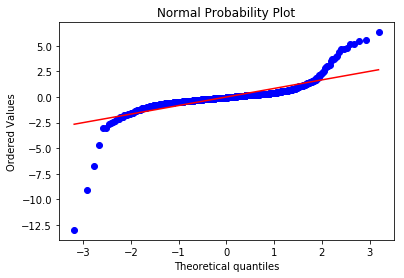

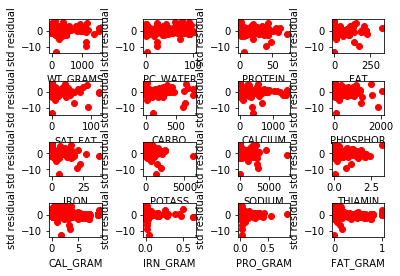

In [11]:
# Cell 7
# Python code for residual analysis of reduced model
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

print("Normal Probability Plot")
influence = fitted2.get_influence()
standardized_residuals = influence.resid_studentized_internal
from scipy import stats
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot')
plt.show()

df['resid']=standardized_residuals

fig3 = plt.figure()
fig3.subplots_adjust(hspace=0.8, wspace=0.8)
ax=fig3.add_subplot(4,4,1)
plt.plot(df['WT_GRAMS'], df['resid'], 'ro')
plt.xlabel('WT_GRAMS')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,2)
plt.plot(df['PC_WATER'], df['resid'], 'ro')
plt.xlabel('PC_WATER')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,3)
plt.plot(df['PROTEIN'], df['resid'], 'ro')
plt.xlabel('PROTEIN')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,4)
plt.plot(df['FAT'], df['resid'], 'ro')
plt.xlabel('FAT')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,5)
plt.plot(df['SAT_FAT'], df['resid'], 'ro')
plt.xlabel('SAT_FAT')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,6)
plt.plot(df['CARBO'], df['resid'], 'ro')
plt.xlabel('CARBO')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,7)
plt.plot(df['CALCIUM'], df['resid'], 'ro')
plt.xlabel('CALCIUM')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,8)
plt.plot(df['PHOSPHOR'], df['resid'], 'ro')
plt.xlabel('PHOSPHOR')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,9)
plt.plot(df['IRON'], df['resid'], 'ro')
plt.xlabel('IRON')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,10)
plt.plot(df['POTASS'], df['resid'], 'ro')
plt.xlabel('POTASS')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,11)
plt.plot(df['SODIUM'], df['resid'], 'ro')
plt.xlabel('SODIUM')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,12)
plt.plot(df['THIAMIN'], df['resid'], 'ro')
plt.xlabel('THIAMIN')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,13)
plt.plot(df['CAL_GRAM'], df['resid'], 'ro')
plt.xlabel('CAL_GRAM')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,14)
plt.plot(df['IRN_GRAM'], df['resid'], 'ro')
plt.xlabel('IRN_GRAM')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,15)
plt.plot(df['PRO_GRAM'], df['resid'], 'ro')
plt.xlabel('PRO_GRAM')
plt.ylabel('std residual')
ax=fig3.add_subplot(4,4,16)
plt.plot(df['FAT_GRAM'], df['resid'], 'ro')
plt.xlabel('FAT_GRAM')
plt.ylabel('std residual')
plt.show()

# Cell 8
## Interpret the results of the residual analysis

+ The residuals are not normally distributed
+ There are some very large outliers (-12.5 standard deviations)
+ In general, relationships appear to be linear and have constant variance
+ POTASS, SODIUM, CARBO, CALCIU, PHOSPHOR, and PRO_GRAM all have high-leverage points (far to the right of other values

Plot of Hat matrix


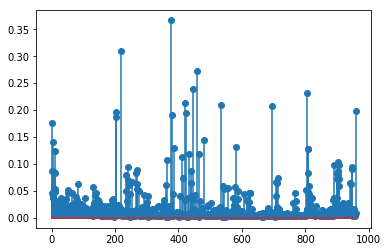

Plot of Influential points - Cook's D


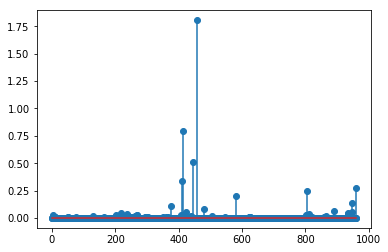

In [6]:
# Cell 9
# Python code to identify high-leverage and influential points
#Hi leverage
import numpy as np
print("Plot of Hat matrix")
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(fitted2)
plt.stem(np.arange(len(test_class.hat_matrix_diag)),test_class.hat_matrix_diag)
plt.show()
print("Plot of Influential points - Cook's D")
plt.stem(np.arange(len(test_class.cooks_distance[0])),test_class.cooks_distance[0])
plt.show()

# Cell 10
## List high-leverage and influential points

The guidelines for high-leverage and influential points are shown below
![Thresholds for High-leverage and influential points](leverageInfluential.jpg)

### High-Leverage points
Using the threshold of 0.0531, there are many points that are high-leverage. 

### Influential Points
Using the threshold of 2.019, there are no influential points. Using the 95th percentile limit of 1.645, there is one infludential point.

### Summary
The influential point should be identified and removed from the data set and the model refitted and residuals and diagnostics checked again.

In [7]:
# Cell 11
# Python code to perform forward selection of all factors
import statsmodels.formula.api as smf
def forward_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model
# remove residual from data set for modeling purposes
df=df.drop('resid',axis=1)
forward=forward_selection(df,'CALORIES')
print(forward.model.formula)
print(forward.rsquared_adj)

CALORIES ~ CARBO + FAT + PROTEIN + POTASS + WT_GRAMS + THIAMIN + IRON + PHOSPHOR + CALCIUM + FAT_GRAM + CAL_GRAM + PC_WATER + SODIUM + IRN_GRAM + PRO_GRAM + POLUNSAT + ASCORBIC + CHOLEST + 1
0.999194112055937


# Cell 12
## Best model found using forward selection

In [8]:
# Cell 13
# Python code to perform backwards selection of all factors

# no code provided

# Cell 14
## Best model found using backwards selection

Remove from Assignment, code not provided

In [9]:
# Cell 15
# Python code to perform stepwise selection of all factors
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X=df
y=df["CALORIES"]
result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  CALORIES                       with p-value 0.0
Add  SAT_FAT                        with p-value 2.67638e-146
Add  POTASS                         with p-value 8.87004e-109
Add  POLUNSAT                       with p-value 3.39053e-133
Add  CALCIUM                        with p-value 6.60136e-121
Drop SAT_FAT                        with p-value 0.669232


C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  MONUNSAT                       with p-value 3.20045e-24
Add  SODIUM                         with p-value 2.55491e-32
Drop MONUNSAT                       with p-value 0.81262
Add  VIT_A_IU                       with p-value 1.02469e-128
Drop CALCIUM                        with p-value 0.522202
Add  PHOSPHOR                       with p-value 3.17102e-101
Add  CHOLEST                        with p-value 4.10119e-10
Drop POTASS                         with p-value 0.576746
Add  POTASS                         with p-value 4.07104e-16
Drop PHOSPHOR                       with p-value 0.713259
Add  WT_GRAMS                       with p-value 8.97181e-23
Drop POTASS                         with p-value 0.0978323
Add  PC_WATER                       with p-value 3.7358e-09
Drop POLUNSAT                       with p-value 0.332975
Add  POTASS                         with p-value 0.000325626
Drop WT_GRAMS                       with p-value 0.913327
Add  CALCIUM                        with p-v

# Cell 16
## Best model found using stepwise selection

In [10]:
# Cell 17
# Python code to perform all subsets selection.
# Not included because it would take too long

# Cell 18
## Best model found using all subsets selection
![All Subsets output](subsetsOutput.png)

# Cell 19
## Summarize the models found using the different selection techniques and pick a best model

+ All Subsets: 21 terms in model, R^2=0.9992
+ Forward Selection: 18 terms in model, R^2=0.9992
+ Stepwise: 9 terms in model, R^2=0.999 (see cell below)

My overall recommendation is to select the stepwise model which has the fewest terms and the R^2 value is the same as the models with more terms. Multicollinearity will be a problem so the smallest possible model is the best choice

In [13]:
# Python code for fitting stepwise multiple regression model
import statsmodels.formula.api as sm
model5 = sm.ols(formula='CALORIES~VIT_A_RE+VIT_A_IU+POTASS+CHOLEST+SODIUM+PHOSPHOR+POLUNSAT+WT_GRAMS+PC_WATER',data=df)
fitted5 = model5.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:               CALORIES   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.386e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:53:22   Log-Likelihood:                -3987.0
No. Observations:                 961   AIC:                             8008.
Df Residuals:                     944   BIC:                             8091.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.4397      6.890    -10.078      0.0